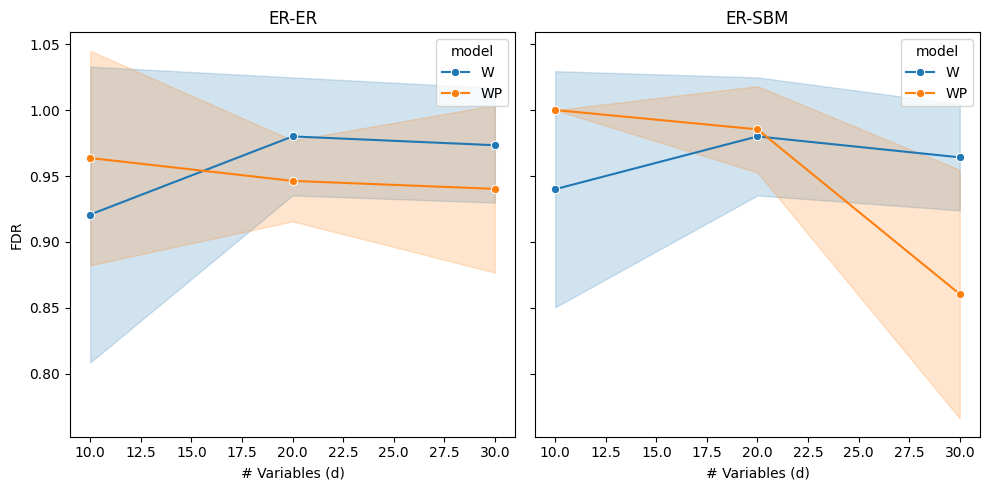

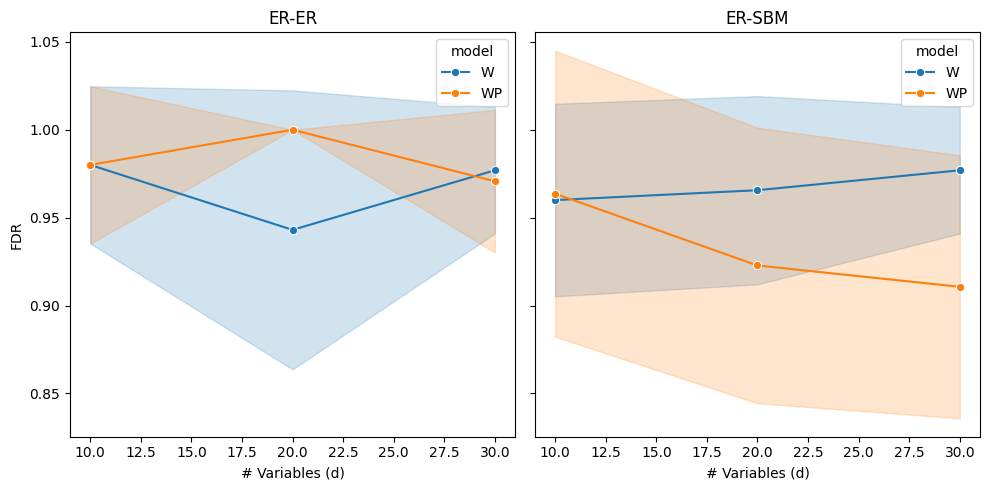

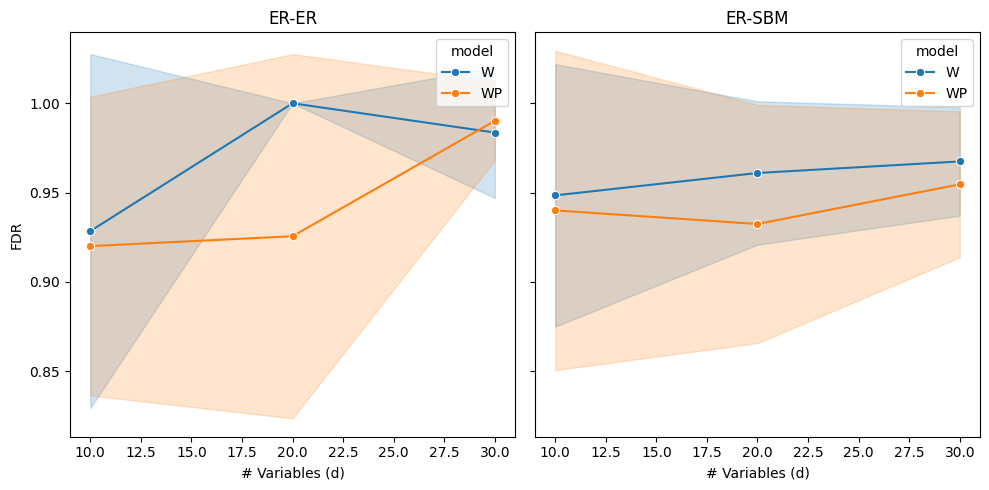

In [35]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Assuming your DataFrame is named 'df'  
# Load the data  
df = pd.read_excel('results/results.xlsx', header=0)  # 0 means that the first row will be used as header

# Filter the data for the desired metric and model  
df_filtered = df[  
    (df["metric"] == "f1_W")  # Replace "fdr_W" with your desired metric  
    & (df["model"].isin(["W", "WP"]))  # Replace with your desired models  
]  

n_ = [100, 200, 300]#, 500]
d_ = [10, 20, 30]

w_graph_types = ['ER']#, 'BA'] 
p_graph_types = ['ER', 'SBM'] 
sem_types = [ 'gauss'] #'exp',
models = ['W', 'WP']

for n in n_:  
        # Create a figure and axes  
        fig, axes = plt.subplots(  
            len(w_graph_types), len(p_graph_types), sharex=True, sharey=True, figsize=(10, 5)  
        )  
        # Loop through the graph types and create subplots  
        for i, w_graph_type in enumerate(w_graph_types):  
            for j, p_graph_type in enumerate(p_graph_types):  
                if len(w_graph_types)==1:
                    ax = axes[j]
                else:
                    ax = axes[i, j]  

                # Filter the data for the current graph types  
                df_subset = df_filtered[  
                    (df_filtered["w_graph_type"] == w_graph_type)  
                    & (df_filtered["p_graph_type"] == p_graph_type)  
                    & (df_filtered["n"] == n)  
                ]  
                # print(df_subset)
                # Calculate the mean and confidence interval  
                sns.lineplot(  
                    x="d",  
                    y="value",  
                    hue="model",  
                    data=df_subset,  
                    ax=ax,  
                    marker="o",  
                    errorbar="sd",  
                    # ci=95,  
                    err_style="band",  
                )  

                # Set the title and axis labels  
                ax.set_title(f"{w_graph_type}-{p_graph_type}")  
                if i == len(w_graph_types) - 1:  
                    ax.set_xlabel("# Variables (d)")  
                if j == 0:  
                    ax.set_ylabel("FDR")  

        # Adjust the layout and show the plot  
        plt.tight_layout()  
        plt.show()

In [6]:
df_subset

,n,d,w_graph_type,p_graph_type,sem_type,model,run_no,threshold,metric,value


In [3]:
# !pip install seaborn